## 1.3.2 Arithmetic Operations on Images

In [92]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [93]:
x = np.uint8([250])

In [94]:
print(x)

[250]


In [95]:
y = np.uint8([10])

In [96]:
print(y)

[10]


In [97]:
x+y

array([4], dtype=uint8)

In [98]:
#250+10=260 0,1,2,...,255,0,1,2,3,4,5

In [99]:
#0 black 255 white

In [100]:
cv2.add(x,y)

array([[255]], dtype=uint8)

In [101]:
img1 = cv2.imread('lostark.jpg')
img2 = cv2.imread('lostark2.jpg')

In [102]:
w=0.5
dst = cv2.addWeighted(img1,w,img2,1-w,0)
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [103]:
def nothing(x):
    pass

In [104]:
cv2.namedWindow('image')
# create trackbars for color change
cv2.createTrackbar(weight, 'image',0,255,nothing)
while(1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    weight = cv2.getTrackbarPos('weight','image')
    dst = cv.addWeighted(img1,weight/255,img2,1-weight/255,0)
    cv2.imshow('image',dst)
cv2.destroyAllWindows()

In [105]:
img1 = cv2.imread('lostark.jpg')
img2 = cv2.imread('lostark2.jpg')

In [106]:
def pltImage(img):
    rows,cols,channels = img.shape
    if channels ==3:
        plt s
    plt.imshow(img)
    plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
    plt.show()

In [107]:
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
print(rows,cols,channels)

168 300 3


In [108]:
roi = img1[0:rows, 0:cols ]

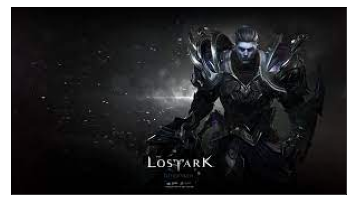

In [109]:
pltImage(img1)

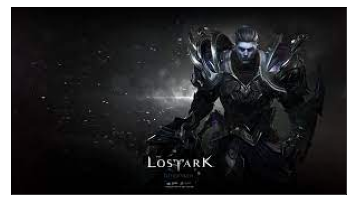

In [110]:
pltImage(roi)

In [111]:
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

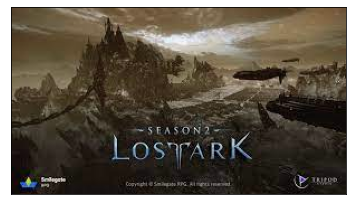

In [112]:
pltImage(img2)

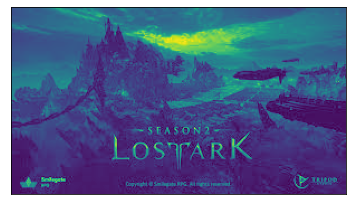

In [113]:
pltImage(img2gray)

In [31]:
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)

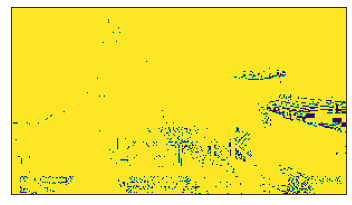

In [114]:
pltImage(mask)

In [31]:
mask_inv = cv2.bitwise_not(mask)

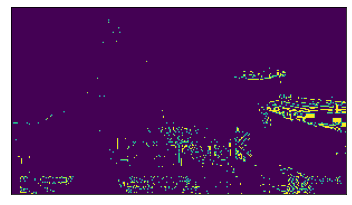

In [115]:
pltImage(mask_inv)

In [116]:
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

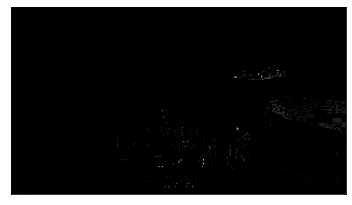

In [117]:
pltImage(img1_bg)

In [118]:
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

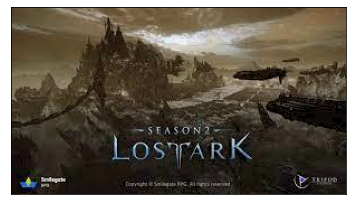

In [119]:
pltImage(img2_fg)

In [120]:
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)

In [121]:
img1[0:rows, 0:cols ] = dst

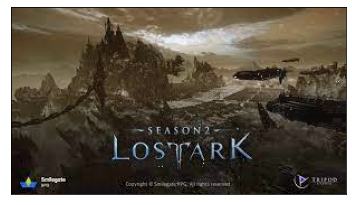

In [122]:
pltImage(img1)

In [123]:
cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()